# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
#import api_keys
api_key = "ee52435dcbbfb764d5b7d965b3b5a6ec"
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

606

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

# List of city data
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")


# Create counters
count_records = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):

   # Group cities in sets of 50 for logging purposes
   if (i % 50 == 0 and i >= 50):
        set_count += 1
        count_records = 0

   # Create endpoint URL with each city
   city_url = url + "&q=" + city

   # Log the url, record, and set numbers
   print("Processing Record %s of Set %s | %s" % (count_records, set_count, city))

   # Add 1 to the record count
   count_records += 1

   # Run an API request for each of the cities
   try:
       # Parse the JSON and retrieve data
       city_weather = requests.get(city_url).json()

       # Parse out the max temp, humidity, and cloudiness
       city_lat = city_weather["coord"]["lat"]
       city_lng = city_weather["coord"]["lon"]
       city_max_temp = city_weather["main"]["temp_max"]
       city_humidity = city_weather["main"]["humidity"]
       city_clouds = city_weather["clouds"]["all"]
       city_wind = city_weather["wind"]["speed"]
       city_country = city_weather["sys"]["country"]
       city_date = city_weather["dt"]

       # Append the City information into city_data list
       city_data.append({"City": city,
                         "Lat": city_lat,
                         "Lng": city_lng,
                         "Max Temp": city_max_temp,
                         "Humidity": city_humidity,
                         "Cloudiness": city_clouds,
                         "Wind Speed": city_wind,
                         "Country": city_country,
                         "Date": city_date})

   # If an error is experienced, skip the city
   except:
       print("City not found. Skipping...")
       pass

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
Processing Record 1 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 2 of Set 1 | hermanus
Processing Record 3 of Set 1 | ushuaia
Processing Record 4 of Set 1 | kapaa
Processing Record 5 of Set 1 | nuevo progreso
Processing Record 6 of Set 1 | mataura
Processing Record 7 of Set 1 | biloela
Processing Record 8 of Set 1 | orange cove
Processing Record 9 of Set 1 | port elizabeth
Processing Record 10 of Set 1 | mumford
Processing Record 11 of Set 1 | jamestown
Processing Record 12 of Set 1 | georgetown
Processing Record 13 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 14 of Set 1 | puerto madryn
Processing Record 15 of Set 1 | vostok
Processing Record 16 of Set 1 | puerto ayora
Processing Record 17 of Set 1 | port alfred
Processing Record 18 of Set 1 | tawang
Processing Record 19 of Set 1 | chernyshevskiy
Processing Record 20 of Set 1 | belyy yar
Processing Record 21 of Set 1 | chuy
Processing Record 22 of Set 1 |

Processing Record 37 of Set 4 | tsihombe
City not found. Skipping...
Processing Record 38 of Set 4 | hasaki
Processing Record 39 of Set 4 | boyuibe
Processing Record 40 of Set 4 | barentsburg
City not found. Skipping...
Processing Record 41 of Set 4 | pevek
Processing Record 42 of Set 4 | morondava
Processing Record 43 of Set 4 | husainabad
Processing Record 44 of Set 4 | nome
Processing Record 45 of Set 4 | roma
Processing Record 46 of Set 4 | divnomorskoye
Processing Record 47 of Set 4 | uray
Processing Record 48 of Set 4 | linguere
City not found. Skipping...
Processing Record 49 of Set 4 | abilene
Processing Record 0 of Set 5 | kungurtug
Processing Record 1 of Set 5 | concepcion
Processing Record 2 of Set 5 | verkhnevilyuysk
Processing Record 3 of Set 5 | paucartambo
City not found. Skipping...
Processing Record 4 of Set 5 | gdynia
Processing Record 5 of Set 5 | lac-megantic
Processing Record 6 of Set 5 | iqaluit
Processing Record 7 of Set 5 | nguiu
City not found. Skipping...
Proc

Processing Record 24 of Set 8 | saint-georges
Processing Record 25 of Set 8 | minab
Processing Record 26 of Set 8 | lovozero
Processing Record 27 of Set 8 | pangkalanbuun
Processing Record 28 of Set 8 | tessalit
Processing Record 29 of Set 8 | huarmey
Processing Record 30 of Set 8 | kirkwall
Processing Record 31 of Set 8 | vardo
Processing Record 32 of Set 8 | ostrovnoy
Processing Record 33 of Set 8 | isangel
Processing Record 34 of Set 8 | los banos
Processing Record 35 of Set 8 | soto la marina
Processing Record 36 of Set 8 | tual
Processing Record 37 of Set 8 | san policarpo
Processing Record 38 of Set 8 | toliary
City not found. Skipping...
Processing Record 39 of Set 8 | vanavara
Processing Record 40 of Set 8 | gat
Processing Record 41 of Set 8 | port blair
Processing Record 42 of Set 8 | avanigadda
Processing Record 43 of Set 8 | scarborough
Processing Record 44 of Set 8 | trairi
Processing Record 45 of Set 8 | ternate
Processing Record 46 of Set 8 | laguna
Processing Record 47 o

Processing Record 12 of Set 12 | kulhudhuffushi
Processing Record 13 of Set 12 | las cruces
Processing Record 14 of Set 12 | salinopolis
Processing Record 15 of Set 12 | nova zagora
Processing Record 16 of Set 12 | bodden town
Processing Record 17 of Set 12 | kyshtovka
Processing Record 18 of Set 12 | lubango
Processing Record 19 of Set 12 | rolla
Processing Record 20 of Set 12 | nioro
Processing Record 21 of Set 12 | clearwater
Processing Record 22 of Set 12 | tawkar
City not found. Skipping...
Processing Record 23 of Set 12 | mergui
City not found. Skipping...
Processing Record 24 of Set 12 | mercedes
Processing Record 25 of Set 12 | arlit
Processing Record 26 of Set 12 | tarata
Processing Record 27 of Set 12 | alappuzha
City not found. Skipping...
Processing Record 28 of Set 12 | kanakapura
Processing Record 29 of Set 12 | maksatikha
Processing Record 30 of Set 12 | beringovskiy
Processing Record 31 of Set 12 | ust-maya
Processing Record 32 of Set 12 | marsa matruh
Processing Record

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Convert array of JSONs into Pandas DataFrame
city_data_pd = pd.DataFrame(city_data)

# Extract relevant fields from the data frame
lats = city_data_pd["Lat"]
max_temps = city_data_pd["Max Temp"]
humidity = city_data_pd["Humidity"]
cloudiness = city_data_pd["Cloudiness"]
wind_speed = city_data_pd["Wind Speed"]

# Export the City_Data into a csv
#city_data_pd.to_csv(output_data_file, index_label="City_ID")

# Show Record Count
city_data_pd.count()

City          551
Cloudiness    551
Country       551
Date          551
Humidity      551
Lat           551
Lng           551
Max Temp      551
Wind Speed    551
dtype: int64

In [6]:
city_data_pd.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,hermanus,33,ZA,1556754409,98,-34.42,19.24,55.00,7.96
1,ushuaia,75,AR,1556751600,80,-54.81,-68.31,39.20,23.04
2,kapaa,90,US,1556754494,83,22.08,-159.32,80.60,13.87
3,nuevo progreso,1,US,1556754808,62,26.05,-97.95,89.60,21.92
4,mataura,97,NZ,1556754614,84,-46.19,168.86,57.99,11.01


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

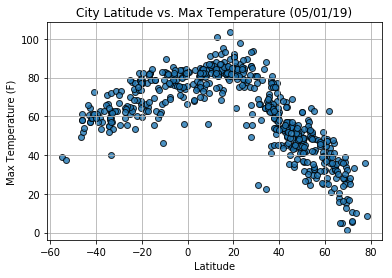

In [10]:
# Build scatter plot for latitude vs. temperature
plt.scatter(lats,
           max_temps,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Fig1.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

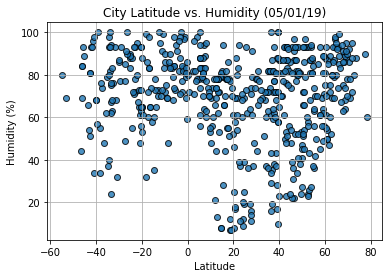

In [11]:
# Build scatter plot for latitude vs. temperature
plt.scatter(lats,
           humidity,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Fig2.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

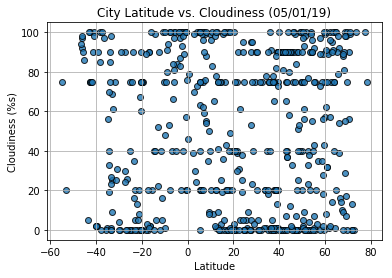

In [12]:
# Build scatter plot for latitude vs. temperature
plt.scatter(lats,
           cloudiness,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

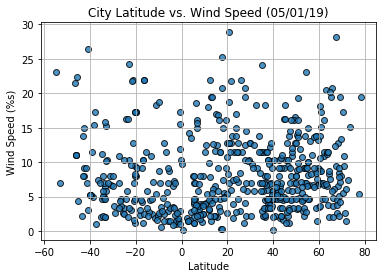

In [13]:
# Build scatter plot for latitude vs. temperature
plt.scatter(lats,
           wind_speed,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (%s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Fig4.png")

# Show plot
plt.show()